In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

data = pd.read_csv("integrated dataset oulad.csv")
data.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,final_result,code_module_presentation,code_module_student_presentation,cohort,module_presentation_length,date_registration,date_unregistration,final_score,sum_click,count_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,AAA-2013J,AAA-2013J-11391,J,268,-159.0,NaN,82.4,934.0,196.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,Pass,AAA-2013J,AAA-2013J-28400,J,268,-53.0,NaN,65.4,1435.0,430.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,Withdrawn,AAA-2013J,AAA-2013J-30268,J,268,-92.0,12.0,NaN,281.0,76.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,Pass,AAA-2013J,AAA-2013J-31604,J,268,-52.0,NaN,76.3,2158.0,663.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,Pass,AAA-2013J,AAA-2013J-32885,J,268,-176.0,NaN,55.0,1034.0,352.0
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,Pass,AAA-2013J,AAA-2013J-38053,J,268,-110.0,NaN,66.9,2445.0,723.0
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,...,Pass,AAA-2013J,AAA-2013J-45462,J,268,-67.0,NaN,67.8,1492.0,355.0
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,...,Pass,AAA-2013J,AAA-2013J-45642,J,268,-29.0,NaN,72.5,1428.0,531.0
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,...,Pass,AAA-2013J,AAA-2013J-52130,J,268,-33.0,NaN,71.2,1894.0,593.0
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,...,Pass,AAA-2013J,AAA-2013J-53025,J,268,-179.0,NaN,79.0,3158.0,904.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   code_module                       32593 non-null  object 
 1   code_presentation                 32593 non-null  object 
 2   id_student                        32593 non-null  int64  
 3   gender                            32593 non-null  object 
 4   region                            32593 non-null  object 
 5   highest_education                 32593 non-null  object 
 6   imd_band                          31482 non-null  object 
 7   age_band                          32593 non-null  object 
 8   num_of_prev_attempts              32593 non-null  int64  
 9   studied_credits                   32593 non-null  int64  
 10  disability                        32593 non-null  object 
 11  final_result                      32593 non-null  object 
 12  code

In [3]:
#Descriptive Statistics:
data.describe()

,id_student,num_of_prev_attempts,studied_credits,module_presentation_length,date_registration,date_unregistration,final_score,sum_click,count_click
count,3.259300e+04,32593.000000,32593.000000,32593.000000,32548.000000,10072.000000,25843.000000,29228.000000,29228.000000
mean,7.066877e+05,0.163225,79.758691,256.010125,-69.411300,49.757645,61.161099,1355.039654,364.557274
std,5.491673e+05,0.479758,41.071900,13.179078,49.260522,82.460890,47.845171,1733.546045,378.351476
min,3.733000e+03,0.000000,30.000000,234.000000,-322.000000,-365.000000,0.000000,1.000000,1.000000
25%,5.085730e+05,0.000000,60.000000,241.000000,-100.000000,-2.000000,16.135000,260.750000,93.000000
50%,5.903100e+05,0.000000,60.000000,262.000000,-57.000000,27.000000,63.540000,739.500000,242.000000
75%,6.444530e+05,0.000000,120.000000,268.000000,-29.000000,109.000000,86.000000,1770.000000,510.000000
max,2.716795e+06,6.000000,655.000000,269.000000,167.000000,444.000000,200.000000,24139.000000,3078.000000


In [4]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)
# Fill the missing values with 0s or mean of respective columns
data.fillna(0, inplace=True)

code_module                             0
code_presentation                       0
id_student                              0
gender                                  0
region                                  0
highest_education                       0
imd_band                             1111
age_band                                0
num_of_prev_attempts                    0
studied_credits                         0
disability                              0
final_result                            0
code_module_presentation                0
code_module_student_presentation        0
cohort                                  0
module_presentation_length              0
date_registration                      45
date_unregistration                 22521
final_score                          6750
sum_click                            3365
count_click                          3365
dtype: int64


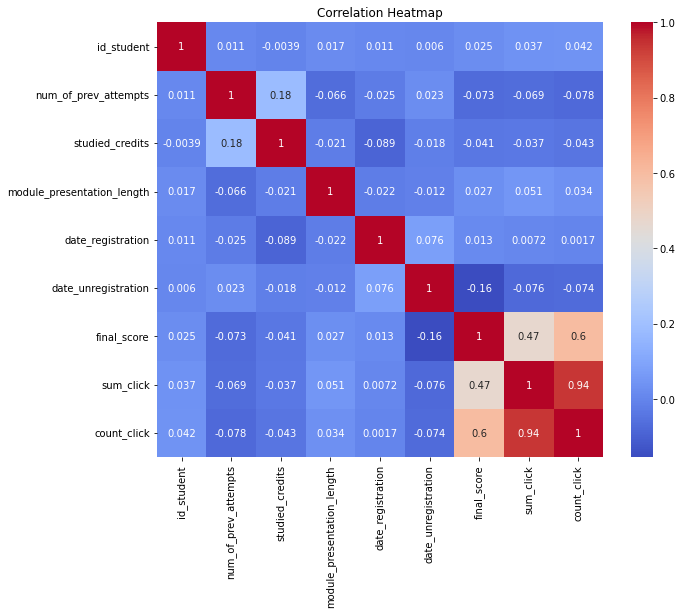

In [5]:
# Calculate correlations
correlation_matrix = data.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

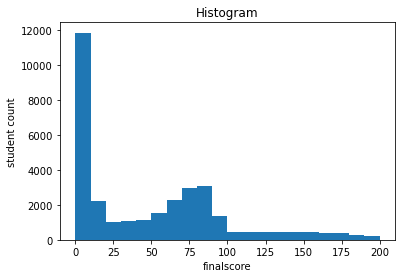

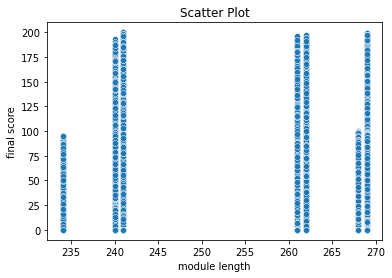

In [6]:
# Histogram
plt.hist(data['final_score'], bins=20)
plt.xlabel('finalscore')
plt.ylabel('student count')
plt.title('Histogram')
plt.show()

# Scatter Plot
sns.scatterplot(x='module_presentation_length', y='final_score', data=data)
plt.xlabel('module length')
plt.ylabel('final score')
plt.title('Scatter Plot')
plt.show()


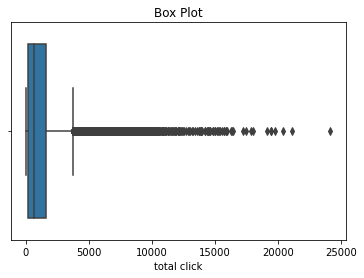

In [7]:
# Box Plot
sns.boxplot(x='sum_click', data=data)
plt.xlabel('total click')
plt.title('Box Plot')

plt.show()

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype(str)

# Encode categorical data using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
X = data.drop('final_result', axis=1)
y = data['final_result']

In [9]:
#Encode label kelas menjadi bilangan bulat
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Ubah target yang sudah diencode menjadi bentuk one-hot encoded
y_one_hot = to_categorical(y_encoded)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Build and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)  
svm_model.fit(X_train, y_train)

# Build and train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Make predictions
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [14]:
# Print the accuracy of both models
print(f'SVM Accuracy: {svm_accuracy}')
print(f'k-NN Accuracy: {knn_accuracy}')

# You can also print a classification report to see more details
print('SVM Classification Report:')
print(classification_report(y_test, svm_predictions))

print('k-NN Classification Report:')
print(classification_report(y_test, knn_predictions))

SVM Accuracy: 0.705629697806412
k-NN Accuracy: 0.6717287927596257
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       593
           1       0.55      0.45      0.50      1495
           2       0.70      0.89      0.78      2458
           3       0.81      0.88      0.84      1973

    accuracy                           0.71      6519
   macro avg       0.51      0.56      0.53      6519
weighted avg       0.63      0.71      0.66      6519

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.21      0.27       593
           1       0.51      0.49      0.50      1495
           2       0.69      0.80      0.74      2458
           3       0.82      0.79      0.80      1973

    accuracy                           0.67      6519
   macro avg       0.60      0.57      0.58      6519
weighted avg       0.66      0.67      0.66      6519



c:\Users\io\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\io\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\io\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


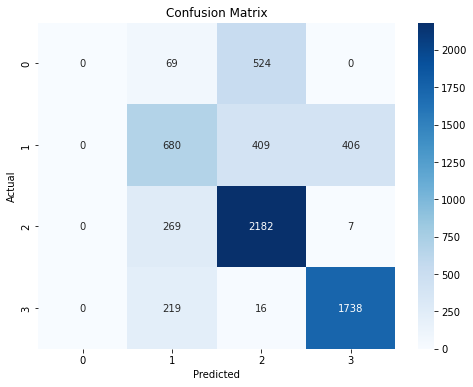

In [15]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' contains the true labels and 'predictions' contains model predictions
cmsvm = confusion_matrix(y_test, svm_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

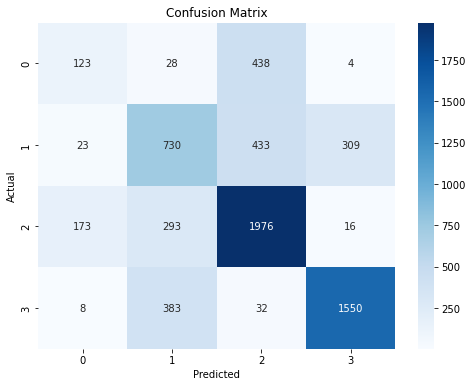

In [16]:
cknn = confusion_matrix(y_test, knn_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cknn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()